In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis for the Chevrolet Agile 2011 OBD 

### Read data

In [2]:
df= pd.read_csv("exp1_14drivers_14cars_dailyRoutes.csv")

# Set time index 
for i in range(df['TIMESTAMP'].__len__()):
    df['TIMESTAMP'][i]= df['TIMESTAMP'][i]/1000
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')
df=df.set_index('TIMESTAMP')


C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10984\1937814435.py:1: DtypeWarning: Columns (1,2,4,5,6,9,10,14,15,16,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("exp1_14drivers_14cars_dailyRoutes.csv")
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10984\1937814435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIMESTAMP'][i]= df['TIMESTAMP'][i]/1000


In [3]:
# Filter data to only chevrolet agile cars only
agile_df= df[df['VEHICLE_ID']=='car1']

agile_df

,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-08-16 16:55:04.267000064,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","33,30%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:12.283000064,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:20.290999808,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",...,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:28.300000000,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:36.320000000,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-12 18:05:58.136000000,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0
2017-09-12 18:06:02.151000064,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0
2017-09-12 18:06:06.176999936,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0


### Data cleaning

In [4]:
# Columns number
agile_df.columns.size

32

In [5]:
agile_df['BAROMETRIC_PRESSURE(KPA)'].unique()

array([100., 101.,  nan,  99.])

In [6]:
for cl in agile_df.columns:
    print(cl)

MARK
MODEL
CAR_YEAR
ENGINE_POWER
AUTOMATIC
VEHICLE_ID
BAROMETRIC_PRESSURE(KPA)
ENGINE_COOLANT_TEMP
FUEL_LEVEL
ENGINE_LOAD
AMBIENT_AIR_TEMP
ENGINE_RPM
INTAKE_MANIFOLD_PRESSURE
MAF
LONG TERM FUEL TRIM BANK 2
FUEL_TYPE
AIR_INTAKE_TEMP
FUEL_PRESSURE
SPEED
SHORT TERM FUEL TRIM BANK 2
SHORT TERM FUEL TRIM BANK 1
ENGINE_RUNTIME
THROTTLE_POS
DTC_NUMBER
TROUBLE_CODES
TIMING_ADVANCE
EQUIV_RATIO
MIN
HOURS
DAYS_OF_WEEK
MONTHS
YEAR


In [7]:
# Select important columns

cleaned_df = agile_df[['BAROMETRIC_PRESSURE(KPA)','ENGINE_COOLANT_TEMP','FUEL_LEVEL','ENGINE_LOAD','AMBIENT_AIR_TEMP','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','MAF','AIR_INTAKE_TEMP','SPEED','ENGINE_RUNTIME','THROTTLE_POS','DTC_NUMBER','TIMING_ADVANCE']]

cleaned_df

,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,AIR_INTAKE_TEMP,SPEED,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TIMING_ADVANCE
TIMESTAMP,,,,,,,,,,,,,,
2017-08-16 16:55:04.267000064,100.0,80.0,"48,60%","33,30%",NaN,1009.0,49.0,"4,49",59.0,0.0,00:03:28,25%,MIL is OFF0 codes,"56,9%"
2017-08-16 16:55:12.283000064,100.0,80.0,"48,60%","32,50%",NaN,1003.0,52.0,"4,51",59.0,0.0,00:03:35,25%,MIL is OFF0 codes,"56,5%"
2017-08-16 16:55:20.290999808,100.0,80.0,"48,60%","32,90%",NaN,995.0,51.0,"4,48",59.0,0.0,00:03:43,25%,MIL is OFF0 codes,"57,3%"
2017-08-16 16:55:28.300000000,100.0,80.0,"48,60%","32,50%",NaN,1004.0,51.0,"4,51",60.0,0.0,00:03:51,25%,MIL is OFF0 codes,"56,5%"
2017-08-16 16:55:36.320000000,100.0,80.0,"48,60%","32,90%",NaN,1005.0,49.0,"4,49",60.0,0.0,00:03:59,25%,MIL is OFF0 codes,"56,9%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-12 18:05:58.136000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN
2017-09-12 18:06:02.151000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN
2017-09-12 18:06:06.176999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN


In [8]:
# Remove Nan values 

cleaned_df.fillna(method='ffill',inplace=True)
cleaned_df.fillna(method='bfill',inplace=True)

# Remove the percentage symbol and convert to numeric values
cleaned_df['THROTTLE_POS'] = cleaned_df['THROTTLE_POS'].str.rstrip('%').astype(float)


C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10984\272979102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.fillna(method='ffill',inplace=True)
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10984\272979102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.fillna(method='bfill',inplace=True)
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10984\272979102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

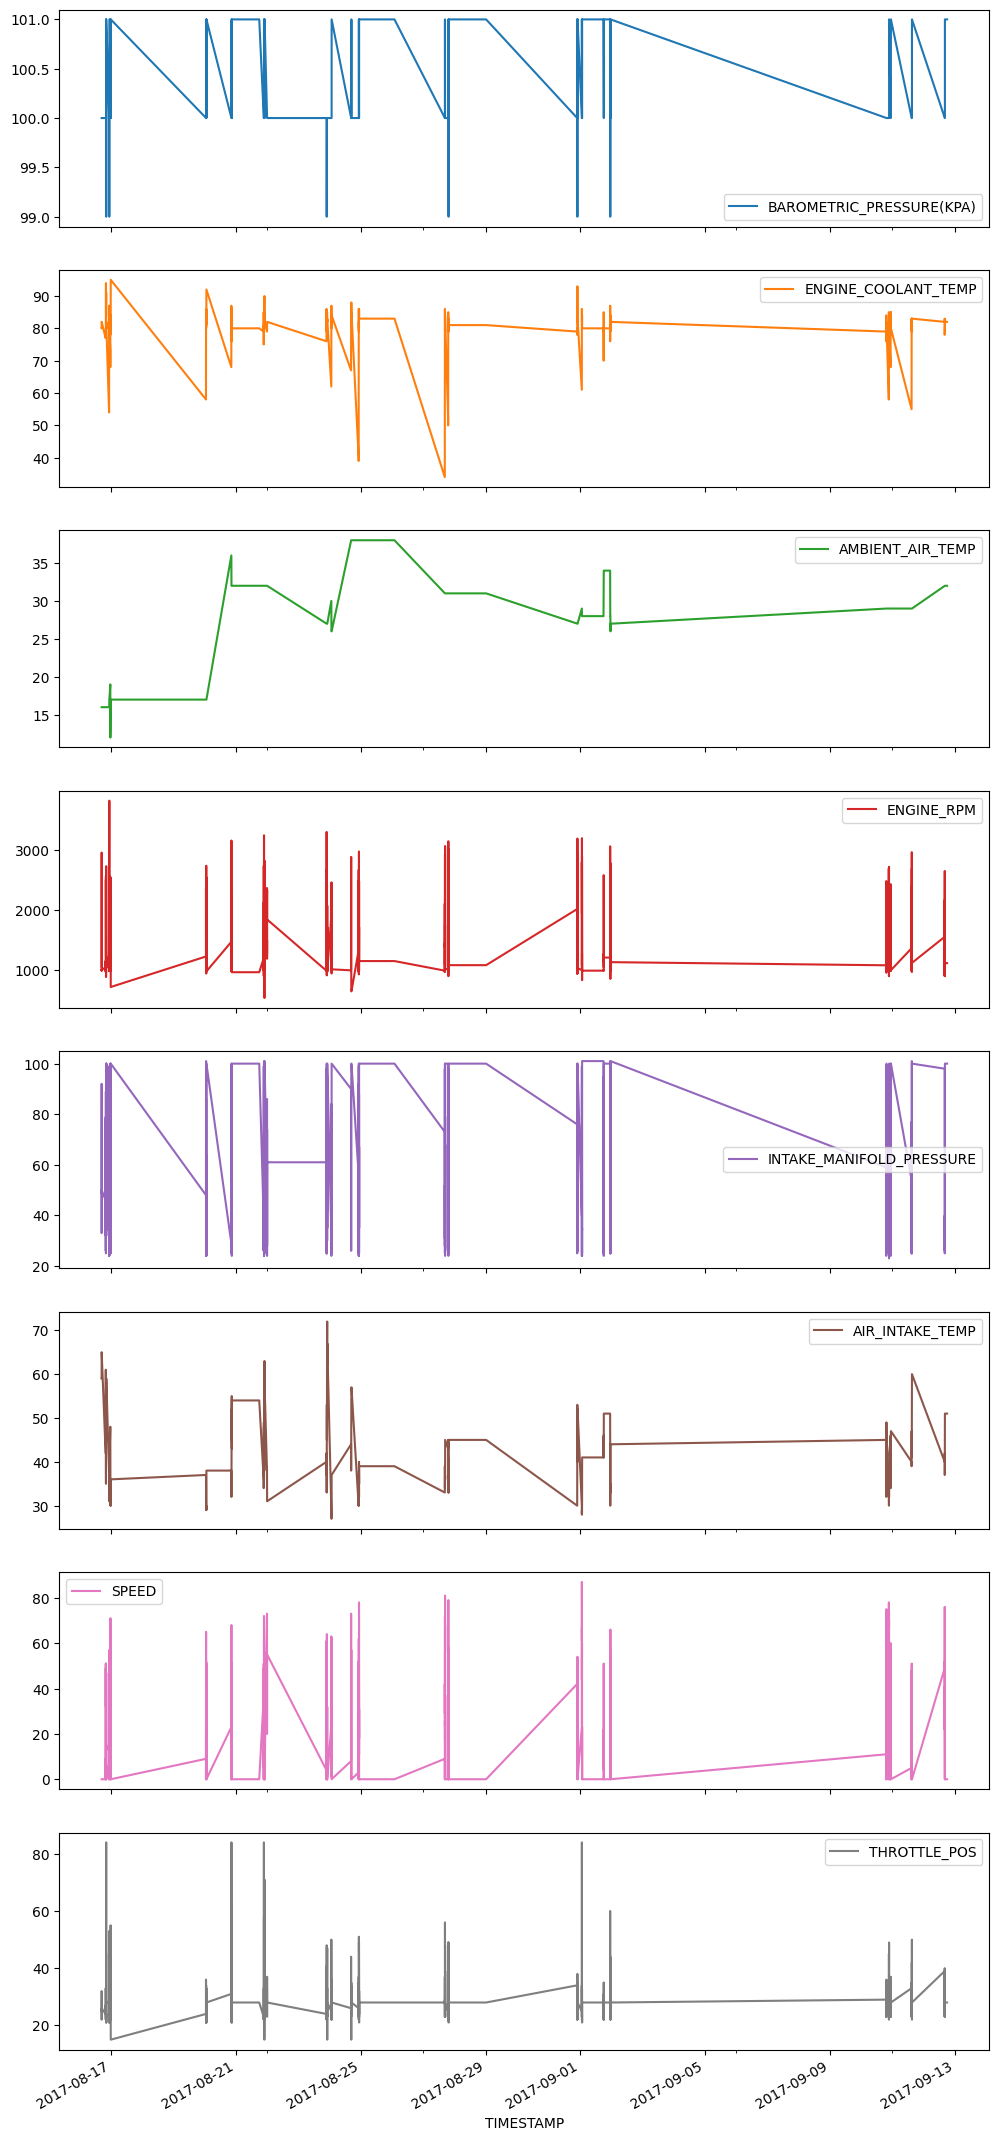

In [9]:
cleaned_df.plot(subplots=True,figsize=(12,30))
plt.show()

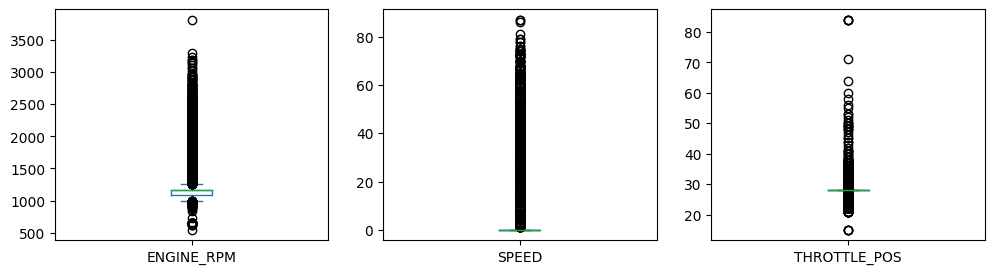

In [10]:
select = ['ENGINE_RPM','SPEED','THROTTLE_POS']

cleaned_df[select].plot(kind='box',subplots=True,figsize=(12,3))
plt.show()

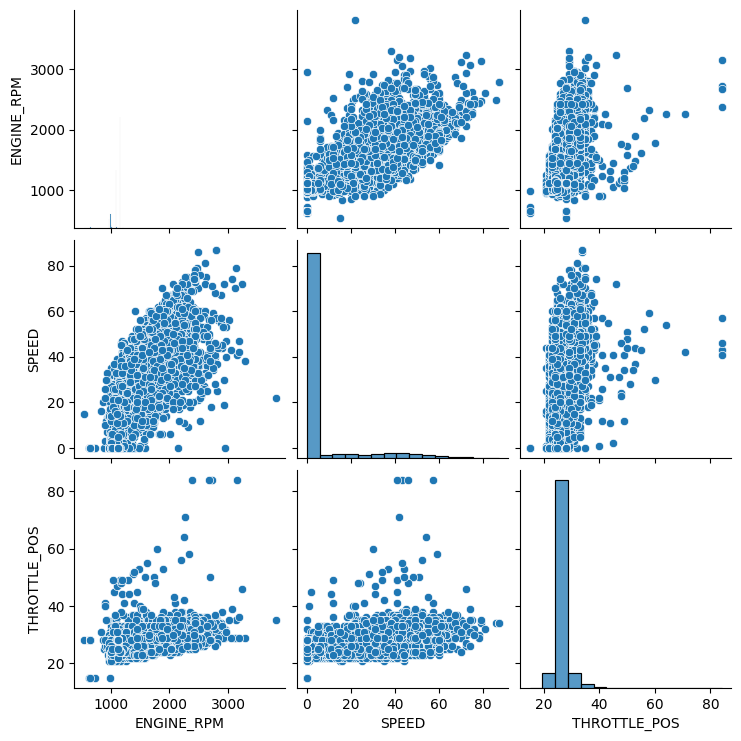

In [11]:
sns.pairplot(cleaned_df[select])
plt.show()

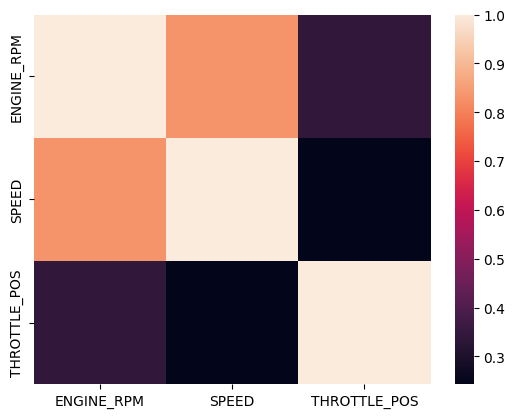

In [12]:
sns.heatmap(cleaned_df[select].corr())
plt.show()

In [13]:

selected_rows = cleaned_df[cleaned_df['ENGINE_COOLANT_TEMP'] == 93]

# Output the selected rows
print(selected_rows['ENGINE_RUNTIME'])


TIMESTAMP
2017-08-16 20:14:49.862999808    00:18:21
2017-08-16 20:14:57.868000000    00:18:29
2017-08-16 20:15:21.996000000    00:18:54
2017-08-16 23:55:14.999000064    00:19:19
2017-08-16 23:55:26.148000000    00:19:31
2017-08-31 22:14:57.997999872    00:18:47
2017-08-31 22:15:09.670000128    00:18:57
2017-08-31 22:15:21.038000128    00:19:09
2017-08-31 22:15:32.799000064    00:19:20
2017-08-31 22:15:40.806999808    00:19:32
2017-08-31 22:15:48.956000000    00:19:40
2017-08-31 22:15:56.983000064    00:19:48
2017-08-31 22:16:04.996999936    00:19:56
Name: ENGINE_RUNTIME, dtype: object


In [14]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(cleaned_df, explorative=True, minimal =False)
# try:
#     profile.to_widgets()
# except:
#     profile.to_notebook_iframe()

# profile.to_file('chev.html')    